# Load Data and Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
raman_data = pd.read_csv('Germondetal.2018aRamandatasets.csv')

# Raman Data Analysis

In [3]:
raman_data = raman_data.drop(['Sample', 'Well ID', 'Antibiotic Class', 'Experiment'], axis = 1)
ave_mds42 = raman_data[raman_data['Cell line'] == "MDS42"].mean()
ave_tp = raman_data[raman_data['Cell line'] == "TP"].mean()
ave_cp = raman_data[raman_data['Cell line'] == "CP"].mean()
ave_nm = raman_data[raman_data['Cell line'] == "NM"].mean()
ave_amk = raman_data[raman_data['Cell line'] == "AMK"].mean()
ave_cfix = raman_data[raman_data['Cell line'] == "CFIX"].mean()
ave_doxy = raman_data[raman_data['Cell line'] == "DOXY"].mean()
ave_cpz = raman_data[raman_data['Cell line'] == "CPZ"].mean()
ave_azm = raman_data[raman_data['Cell line'] == "AZM"].mean()
ave_enx = raman_data[raman_data['Cell line'] == "ENX"].mean()
ave_cpfx = raman_data[raman_data['Cell line'] == "CPFX"].mean()
ave_raman = pd.concat([ave_mds42, ave_tp, ave_cp, ave_nm, ave_amk, ave_cfix, ave_doxy, ave_cpz, ave_azm, ave_enx, ave_cpfx], axis = 1)
ave_raman.columns = ["MDS42", "TP", "CP", "NM", "AMK", "CFIX", "DOXY", "CPZ", "AZM", "ENX", "CPFX"]
trans_raman_ave = ave_raman.apply(lambda x: np.log(x)) # natural log (Thermodynamic)
trans_raman_ave = trans_raman_ave.to_numpy().T

C:\Users\tjker\AppData\Local\Temp/ipykernel_5180/2540591024.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ave_mds42 = raman_data[raman_data['Cell line'] == "MDS42"].mean()
C:\Users\tjker\AppData\Local\Temp/ipykernel_5180/2540591024.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ave_tp = raman_data[raman_data['Cell line'] == "TP"].mean()
C:\Users\tjker\AppData\Local\Temp/ipykernel_5180/2540591024.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ave_cp = raman_data[raman_da

## Survival Analysis - Averaged Data

In [4]:
svd_raman_ave = TruncatedSVD(n_components=10, n_iter=7, random_state=42)
svd_raman_ave.fit(trans_raman_ave)
print(svd_raman_ave.explained_variance_ratio_)
print(svd_raman_ave.explained_variance_ratio_.sum())
# print(svd_raman_ave.singular_values_)
print(svd_raman_ave.components_)
trans_raman_ave_X = svd_raman_ave.transform(trans_raman_ave)

[0.23515659 0.41963145 0.11029975 0.08100872 0.05162635 0.03617037
 0.02084019 0.0170119  0.01463851 0.00847094]
0.9948547702172547
[[-3.33967041e-02 -3.33683428e-02 -3.33595093e-02 ... -3.98251550e-02
  -3.96414506e-02 -4.00517577e-02]
 [ 2.07866269e-02  2.23482123e-02  2.16064919e-02 ...  1.62902200e-02
   3.34376213e-02  3.34801195e-02]
 [-3.41320136e-03 -3.35400607e-03 -7.34452057e-05 ...  3.03813403e-02
   1.17755436e-02 -3.43945715e-03]
 ...
 [-2.45318899e-02 -2.47825587e-02 -2.23079879e-02 ...  2.70081050e-02
   6.59523465e-03 -2.07415050e-02]
 [ 6.26060392e-03 -3.81548790e-03 -1.07087333e-03 ...  3.43871646e-03
  -4.44720874e-02 -6.84652899e-02]
 [ 1.93037002e-02  2.35844515e-02  1.07416321e-02 ... -1.51444744e-02
   3.01383541e-02  6.12168532e-02]]


### Heatmap

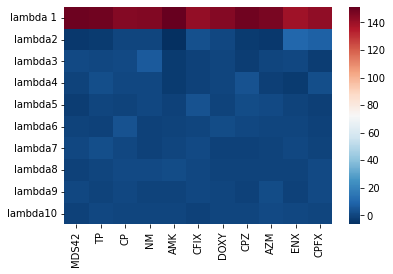

<AxesSubplot:>

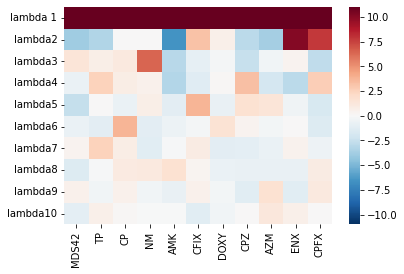

In [5]:
lambdas = ['lambda 1', 'lambda2', 'lambda3', 'lambda4', 'lambda5', 'lambda6', 'lambda7', 'lambda8', 'lambda9', 'lambda10']
sns.heatmap(trans_raman_ave_X.T, cmap='RdBu_r', xticklabels=ave_raman.columns, yticklabels=lambdas)
plt.show()
sns.heatmap(trans_raman_ave_X.T, vmax=11, vmin=-11, cmap='RdBu_r', xticklabels=ave_raman.columns, yticklabels=lambdas)

Prot Synth 30S: NM, AMK, DOXY <br>
Prot Synth 50S: AZM, CP <br>
DNA Gyrase: CPFX, ENX <br>
Cell Wall: CPZ, CFIX <br>
Folic Acid: TP

### Prep Data for Visualizing Raman Waves

In [6]:
col_vars = raman_data.drop(['Cell line'], axis = 1).columns.to_numpy().astype(float)
group_1 = ave_mds42.to_numpy()
group_2 = ave_tp.to_numpy()
group_3 = ave_cp.to_numpy()
group_4 = ave_nm.to_numpy()
group_5 = ave_amk.to_numpy()
group_6 = ave_cfix.to_numpy()
group_7 = ave_doxy.to_numpy()
group_8 = ave_cpz.to_numpy()
group_9 = ave_azm.to_numpy()
group_10 = ave_enx.to_numpy()
group_11 = ave_cpfx.to_numpy()

In [7]:
recon_1_group = svd_raman_ave.inverse_transform(svd_raman_ave.transform(group_1.reshape(1,-1)))
recon_2_group = svd_raman_ave.inverse_transform(svd_raman_ave.transform(group_2.reshape(1,-1)))
recon_3_group = svd_raman_ave.inverse_transform(svd_raman_ave.transform(group_3.reshape(1,-1)))
recon_4_group = svd_raman_ave.inverse_transform(svd_raman_ave.transform(group_4.reshape(1,-1)))
recon_5_group = svd_raman_ave.inverse_transform(svd_raman_ave.transform(group_5.reshape(1,-1)))
recon_6_group = svd_raman_ave.inverse_transform(svd_raman_ave.transform(group_6.reshape(1,-1)))
recon_7_group = svd_raman_ave.inverse_transform(svd_raman_ave.transform(group_7.reshape(1,-1)))
recon_8_group = svd_raman_ave.inverse_transform(svd_raman_ave.transform(group_8.reshape(1,-1)))
recon_9_group = svd_raman_ave.inverse_transform(svd_raman_ave.transform(group_9.reshape(1,-1)))
recon_10_group = svd_raman_ave.inverse_transform(svd_raman_ave.transform(group_10.reshape(1,-1)))
recon_11_group = svd_raman_ave.inverse_transform(svd_raman_ave.transform(group_11.reshape(1,-1)))

Text(0, 0.5, 'Natural Log of Measurement')

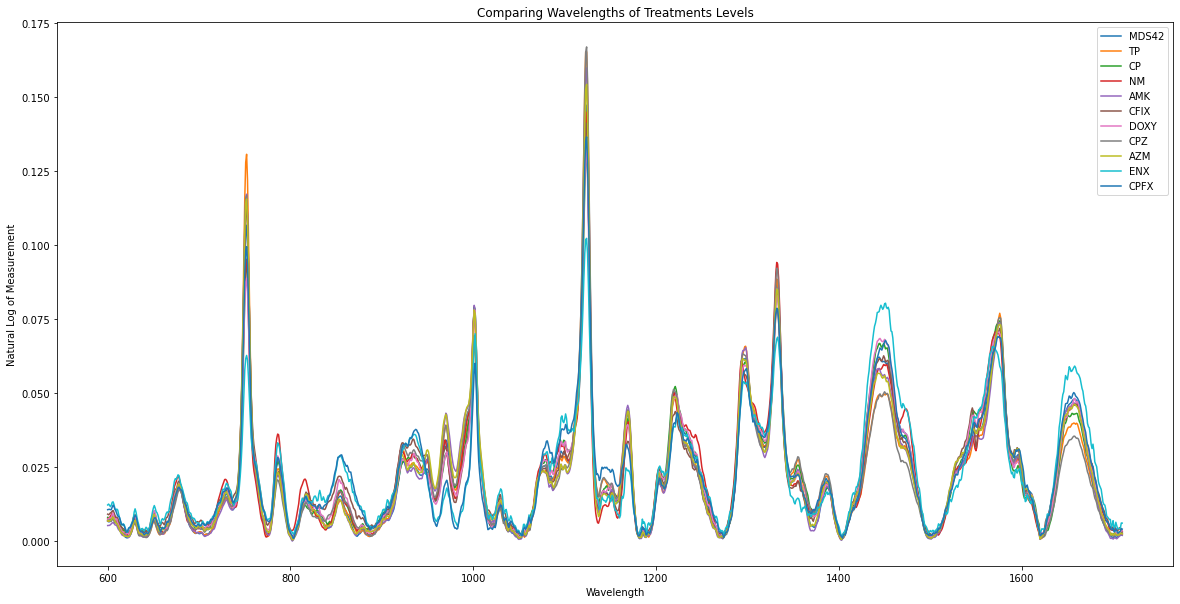

In [8]:
fig, axes = plt.subplots(1,1, figsize=(20,10))
axes.plot(col_vars, group_1, label='MDS42')
axes.plot(col_vars, group_2, label='TP')
axes.plot(col_vars, group_3, label='CP')
axes.plot(col_vars, group_4, label='NM')
axes.plot(col_vars, group_5, label='AMK')
axes.plot(col_vars, group_6, label='CFIX')
axes.plot(col_vars, group_7, label='DOXY')
axes.plot(col_vars, group_8, label='CPZ')
axes.plot(col_vars, group_9, label='AZM')
axes.plot(col_vars, group_10, label='ENX')
axes.plot(col_vars, group_11, label='CPFX')
axes.legend()
axes.set_title("Comparing Wavelengths of Treatments Levels")
axes.set_xlabel("Wavelength")
axes.set_ylabel("Natural Log of Measurement")
# plt.savefig('Figures/Comparing_Wavelengths_of_DEP_Levels.jpeg')

## Survival Analysis - Non Averaged Data

### Prep Data

In [9]:
mds42 = raman_data[raman_data['Cell line'] == "MDS42"]
mds42 = mds42.index
tp = raman_data[raman_data['Cell line'] == "TP"]
tp = tp.index
cp = raman_data[raman_data['Cell line'] == "CP"]
cp = cp.index
nm = raman_data[raman_data['Cell line'] == "NM"]
nm = nm.index
amk = raman_data[raman_data['Cell line'] == "AMK"]
amk = amk.index
cfix = raman_data[raman_data['Cell line'] == "CFIX"]
cfix = cfix.index
doxy = raman_data[raman_data['Cell line'] == "DOXY"]
doxy = doxy.index
cpz = raman_data[raman_data['Cell line'] == "CPZ"]
cpz = cpz.index
azm = raman_data[raman_data['Cell line'] == "AZM"]
azm = azm.index
enx = raman_data[raman_data['Cell line'] == "ENX"]
enx = enx.index
cpfx = raman_data[raman_data['Cell line'] == "CPFX"]
cpfx = cpfx.index
labels = np.zeros(len(raman_data))
labels[mds42] = 1
labels[tp] = 2
labels[cp] = 3
labels[nm] = 4
labels[amk] = 5
labels[cfix] = 6
labels[doxy] = 7
labels[cpz] = 8
labels[azm] = 9
labels[enx] = 10
labels[cpfx] = 11

In [10]:
# raman = raman_data.drop(['Sample', 'Well ID', 'Antibiotic Class', 'Experiment', 'Cell line'], axis = 1)
raman = raman_data.drop(['Cell line'], axis = 1)
raman.head()

,600,601,602,603,604,605,606,607,608,609,...,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710
0,0.007554,0.007761,0.007082,0.006893,0.008112,0.008258,0.007369,0.007464,0.008070,0.007948,...,0.002183,0.001079,0.001875,0.002120,0.001775,0.002379,0.003023,0.002218,0.000256,-0.000176
1,0.007305,0.006389,0.006736,0.007135,0.006493,0.006545,0.007246,0.007102,0.006411,0.005860,...,0.000971,0.000884,-0.000091,0.000462,0.001663,0.001434,0.001185,0.001270,0.001095,0.000264
2,0.006951,0.006401,0.007387,0.008115,0.006976,0.006880,0.008060,0.008416,0.007954,0.007149,...,0.001076,0.001468,0.000690,0.001055,0.002366,0.003043,0.003602,0.003390,0.002237,0.001658
3,0.006150,0.005982,0.007028,0.008062,0.007662,0.007029,0.006868,0.007015,0.006673,0.005976,...,0.000414,0.000442,0.001383,0.001421,0.000892,0.001037,0.000955,0.001018,0.001283,0.000707
4,0.008663,0.009366,0.008503,0.007872,0.008912,0.008938,0.007641,0.006754,0.005963,0.005282,...,0.001044,0.000509,0.000558,0.001029,0.001473,0.001834,0.002523,0.002452,0.001291,0.000798


In [11]:
raman[raman <= 0] = 0.0001
trans_raman_data = raman.apply(lambda x: np.log(x)) # natural log (Thermodynamic)
# trans_ave_data = ave_data.apply(lambda x: x**.5) # Square root (Renyi Entropy)
# trans_ave_data = ave_data.apply(lambda x: x) # Shannon Entropy
raman_X = trans_raman_data.to_numpy()

In [12]:
svd_raman = TruncatedSVD(n_components=6, n_iter=7, random_state=42)
svd_raman.fit(raman_X.T)
# print(svd_raman.explained_variance_ratio_)
print(svd_raman.explained_variance_ratio_.sum())
# print(svd_raman.singular_values_)
print(svd_raman.components_)

0.879026464384138
[[-0.0404271  -0.04107798 -0.0409173  ... -0.038608   -0.03753994
  -0.03822366]
 [ 0.00714594  0.03887122  0.03342798 ... -0.07985149 -0.09390183
  -0.08228722]
 [ 0.00461198  0.02301689  0.02750838 ... -0.02436367 -0.01559777
  -0.00460758]
 [ 0.02086983  0.01750972  0.00070356 ... -0.04868767 -0.04977153
  -0.02993633]
 [-0.014777   -0.02040133 -0.0100467  ... -0.0473696  -0.02295368
  -0.0409781 ]
 [-0.0261912  -0.01785512 -0.02219045 ... -0.03118504 -0.00477275
  -0.00464777]]


In [13]:
trans_raman_X = svd_raman.transform(raman_X.T)

In [14]:
split_raman_data = {}
for i in range(trans_raman_X.shape[1]):
    mds42_data = trans_raman_X[mds42,i]
    tp_data = trans_raman_X[tp,i]
    cp_data = trans_raman_X[cp,i]
    nm_data = trans_raman_X[nm,i]
    amk_data = trans_raman_X[amk,i]
    cfix_data = trans_raman_X[cfix,i]
    doxy_data = trans_raman_X[doxy,i]
    cpz_data = trans_raman_X[cpz,i]
    azm_data = trans_raman_X[azm,i]
    enx_data = trans_raman_X[enx,i]
    cpfx_data = trans_raman_X[cpfx,i]
    col_data = [mds42_data, tp_data, cp_data, nm_data, amk_data, cfix_data, doxy_data, cpz_data, azm_data, enx_data, cpfx_data]
    split_raman_data[i] = col_data

### Heatmaps

Text(0.5, 1.0, 'Heatmap for CPFX')

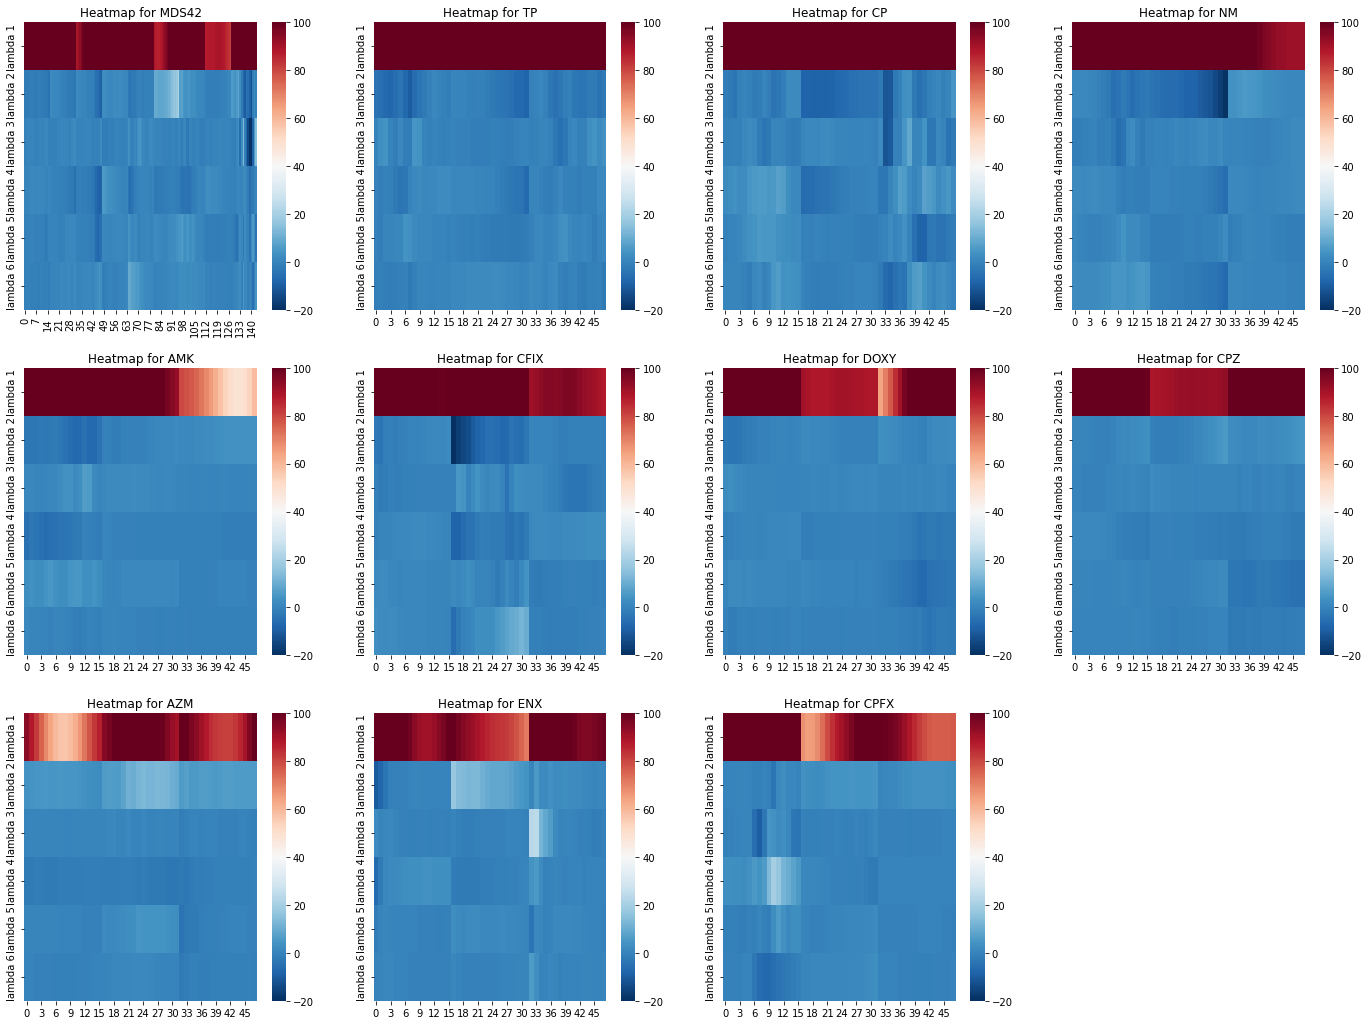

In [15]:
y_axis_labels = ["lambda 1", "lambda 2","lambda 3","lambda 4", "lambda 5", "lambda 6"]
fig = plt.figure(figsize = (24,18)) # width x height
ax1 = fig.add_subplot(3, 4, 1) # row, column, position
ax2 = fig.add_subplot(3, 4, 2)
ax3 = fig.add_subplot(3, 4, 3)
ax4 = fig.add_subplot(3, 4, 4)
ax5 = fig.add_subplot(3, 4, 5)
ax6 = fig.add_subplot(3, 4, 6)
ax7 = fig.add_subplot(3, 4, 7)
ax8 = fig.add_subplot(3, 4, 8)
ax9 = fig.add_subplot(3, 4, 9)
ax10 = fig.add_subplot(3, 4, 10)
ax11 = fig.add_subplot(3, 4, 11)
sns.heatmap(trans_raman_X[mds42,:trans_raman_X.shape[1]].T, ax=ax1, vmax=100, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax1.set_title("Heatmap for MDS42")
sns.heatmap(trans_raman_X[tp,:trans_raman_X.shape[1]].T, ax=ax2, vmax=100, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax2.set_title("Heatmap for TP")
sns.heatmap(trans_raman_X[cp,:trans_raman_X.shape[1]].T, ax=ax3, vmax=100, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax3.set_title("Heatmap for CP")
sns.heatmap(trans_raman_X[nm,:trans_raman_X.shape[1]].T, ax=ax4, vmax=100, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax4.set_title("Heatmap for NM")
sns.heatmap(trans_raman_X[amk,:trans_raman_X.shape[1]].T, ax=ax5, vmax=100, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax5.set_title("Heatmap for AMK")
sns.heatmap(trans_raman_X[cfix,:trans_raman_X.shape[1]].T, ax=ax6, vmax=100, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax6.set_title("Heatmap for CFIX")
sns.heatmap(trans_raman_X[doxy,:trans_raman_X.shape[1]].T, ax=ax7, vmax=100, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax7.set_title("Heatmap for DOXY")
sns.heatmap(trans_raman_X[cpz,:trans_raman_X.shape[1]].T, ax=ax8, vmax=100, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax8.set_title("Heatmap for CPZ")
sns.heatmap(trans_raman_X[azm,:trans_raman_X.shape[1]].T, ax=ax9, vmax=100, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax9.set_title("Heatmap for AZM")
sns.heatmap(trans_raman_X[enx,:trans_raman_X.shape[1]].T, ax=ax10, vmax=100, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax10.set_title("Heatmap for ENX")
sns.heatmap(trans_raman_X[cpfx,:trans_raman_X.shape[1]].T, ax=ax11, vmax=100, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax11.set_title("Heatmap for CPFX")

Text(0.5, 1.0, 'Heatmap for CPFX')

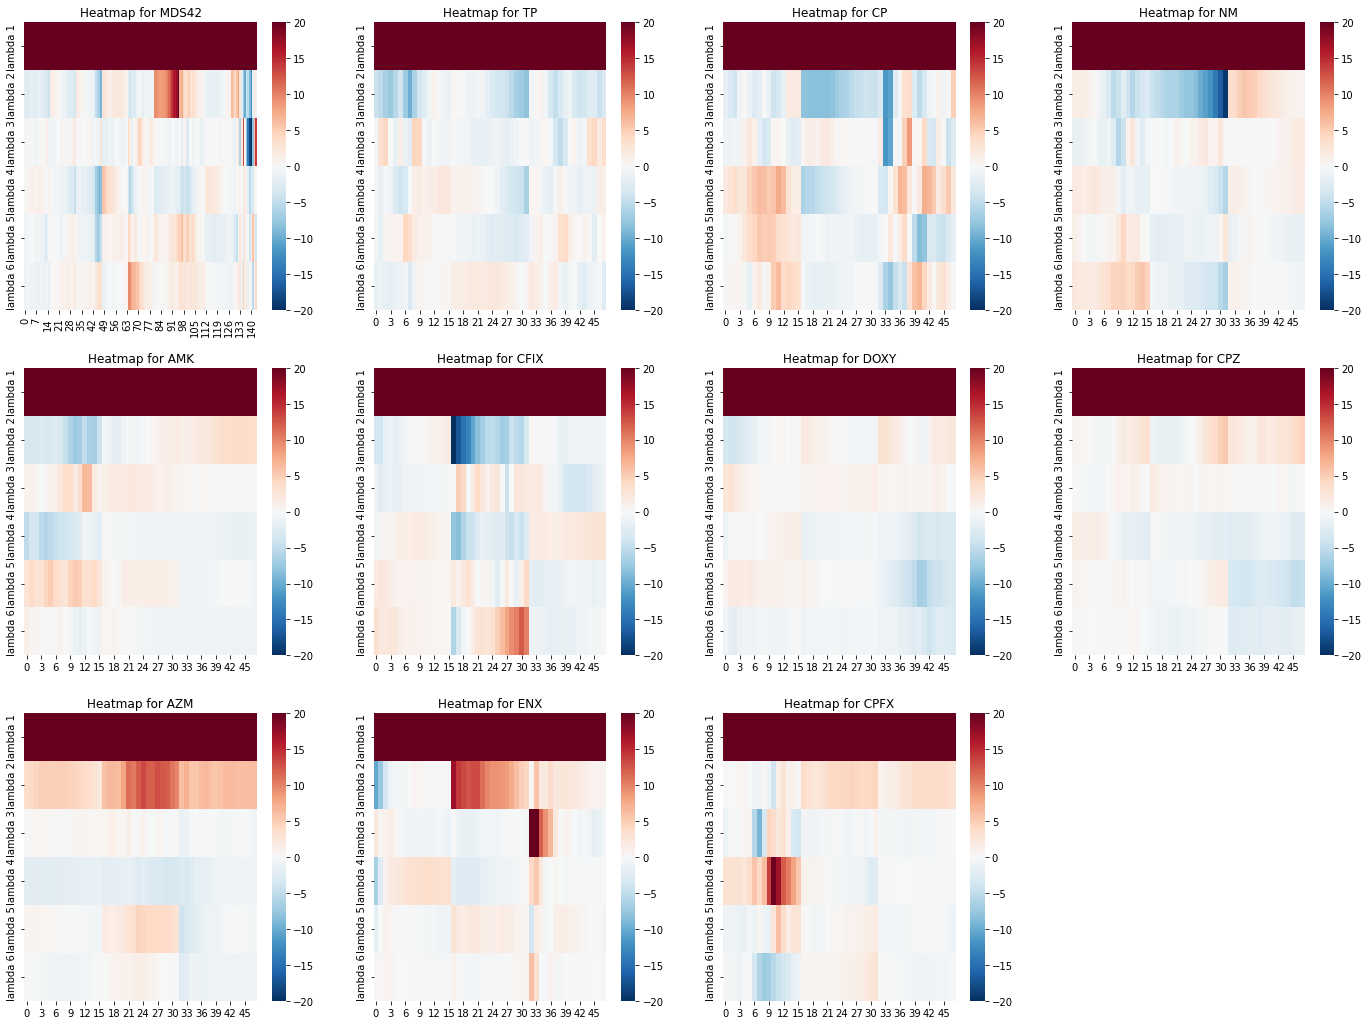

In [16]:
y_axis_labels = ["lambda 1", "lambda 2","lambda 3","lambda 4", "lambda 5", "lambda 6"]
fig = plt.figure(figsize = (24,18)) # width x height
ax1 = fig.add_subplot(3, 4, 1) # row, column, position
ax2 = fig.add_subplot(3, 4, 2)
ax3 = fig.add_subplot(3, 4, 3)
ax4 = fig.add_subplot(3, 4, 4)
ax5 = fig.add_subplot(3, 4, 5)
ax6 = fig.add_subplot(3, 4, 6)
ax7 = fig.add_subplot(3, 4, 7)
ax8 = fig.add_subplot(3, 4, 8)
ax9 = fig.add_subplot(3, 4, 9)
ax10 = fig.add_subplot(3, 4, 10)
ax11 = fig.add_subplot(3, 4, 11)
sns.heatmap(trans_raman_X[mds42,:trans_raman_X.shape[1]].T, ax=ax1, vmax=20, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax1.set_title("Heatmap for MDS42")
sns.heatmap(trans_raman_X[tp,:trans_raman_X.shape[1]].T, ax=ax2, vmax=20, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax2.set_title("Heatmap for TP")
sns.heatmap(trans_raman_X[cp,:trans_raman_X.shape[1]].T, ax=ax3, vmax=20, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax3.set_title("Heatmap for CP")
sns.heatmap(trans_raman_X[nm,:trans_raman_X.shape[1]].T, ax=ax4, vmax=20, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax4.set_title("Heatmap for NM")
sns.heatmap(trans_raman_X[amk,:trans_raman_X.shape[1]].T, ax=ax5, vmax=20, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax5.set_title("Heatmap for AMK")
sns.heatmap(trans_raman_X[cfix,:trans_raman_X.shape[1]].T, ax=ax6, vmax=20, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax6.set_title("Heatmap for CFIX")
sns.heatmap(trans_raman_X[doxy,:trans_raman_X.shape[1]].T, ax=ax7, vmax=20, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax7.set_title("Heatmap for DOXY")
sns.heatmap(trans_raman_X[cpz,:trans_raman_X.shape[1]].T, ax=ax8, vmax=20, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax8.set_title("Heatmap for CPZ")
sns.heatmap(trans_raman_X[azm,:trans_raman_X.shape[1]].T, ax=ax9, vmax=20, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax9.set_title("Heatmap for AZM")
sns.heatmap(trans_raman_X[enx,:trans_raman_X.shape[1]].T, ax=ax10, vmax=20, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax10.set_title("Heatmap for ENX")
sns.heatmap(trans_raman_X[cpfx,:trans_raman_X.shape[1]].T, ax=ax11, vmax=20, vmin=-20, cmap='RdBu_r', yticklabels=y_axis_labels)
ax11.set_title("Heatmap for CPFX")

### Boxplots

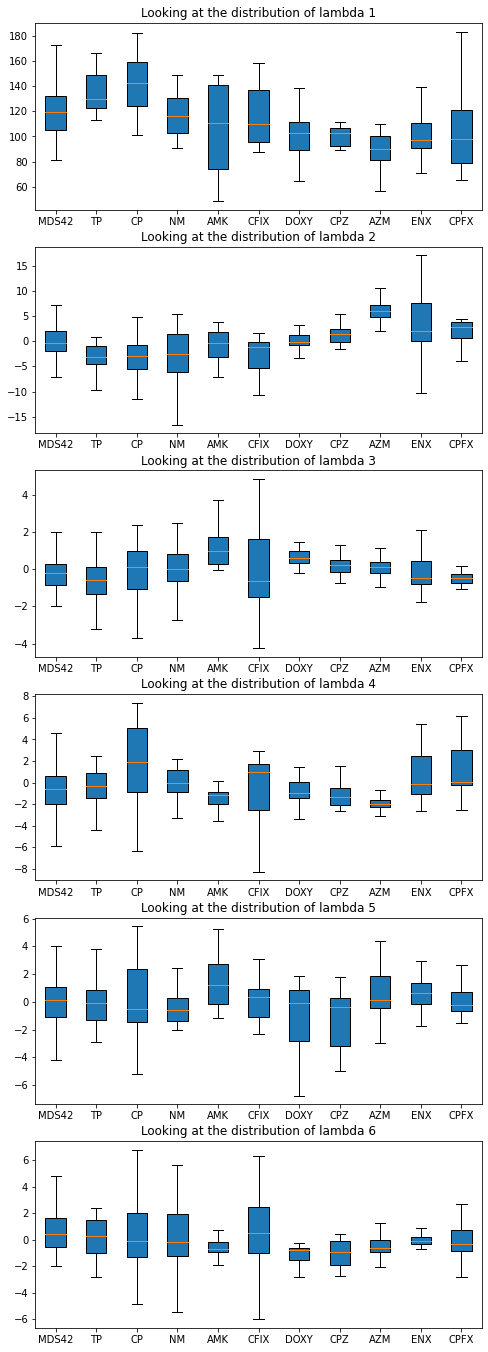

In [17]:
fig, axes = plt.subplots(6,1, figsize=(8,24))
for (i, ax) in enumerate(axes.flat):
    ax.boxplot(split_raman_data[i], vert=True, patch_artist=True, labels = ave_raman.columns, showfliers=False)
    ax.set_title(f"Looking at the distribution of lambda {(i + 1)}")
# plt.savefig('Figures/Box_Plot_Distribution_of_Lambda_by_DEP_Level.jpeg')
plt.show()